In [2]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [3]:
df = pd.read_csv("coffee_sales.csv")

df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [4]:
df.describe()

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


In [5]:
# --- Check Uniqueness --#
for col in df.columns:
    if col in ["Date", "Time"]:
        continue
    unique_val = df[col].unique()
    print(f'{col}: {unique_val}')

hour_of_day: [10 12 13 15 16 18 19 11 14 17  9 20  8 22  7 21  6]
cash_type: ['card']
money: [38.7  28.9  33.8  24.   32.82 37.72 27.92 23.02 18.12 35.76 30.86 25.96
 21.06]
coffee_name: ['Latte' 'Hot Chocolate' 'Americano' 'Americano with Milk' 'Cocoa'
 'Cortado' 'Espresso' 'Cappuccino']
Time_of_Day: ['Morning' 'Afternoon' 'Night']
Weekday: ['Fri' 'Sat' 'Sun' 'Mon' 'Tue' 'Wed' 'Thu']
Month_name: ['Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec' 'Jan' 'Feb']
Weekdaysort: [5 6 7 1 2 3 4]
Monthsort: [ 3  4  5  6  7  8  9 10 11 12  1  2]


In [6]:
print("Duplicated Rows", df.duplicated().sum(), "\n")


# --- Check Duplicate --- #
for col in df.columns:
    duplicated_fields = df[col].duplicated().any()
    print(f'{col}: {duplicated_fields}')

Duplicated Rows 0 

hour_of_day: True
cash_type: True
money: True
coffee_name: True
Time_of_Day: True
Weekday: True
Month_name: True
Weekdaysort: True
Monthsort: True
Date: True
Time: False


In [7]:
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'


df['is_weekend'] = df['Weekdaysort'].isin([6, 7])
df['season'] = df['Monthsort'].apply(get_season)


df.head()


,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time,is_weekend,season
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000,False,Spring
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000,False,Spring
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000,False,Spring
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000,False,Spring
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000,False,Spring


Customer Segments with Key Metrics:
  Time_of_Day cash_type  avg_money  total_transactions  total_revenue  \
2       Night      card  32.890904                1161       38186.34   
0   Afternoon      card  31.643187                1205       38130.04   
1     Morning      card  30.422693                1181       35929.20   

    most_common_coffee    segment  
2                Latte      Night  
0                Latte  Afternoon  
1  Americano with Milk    Morning  


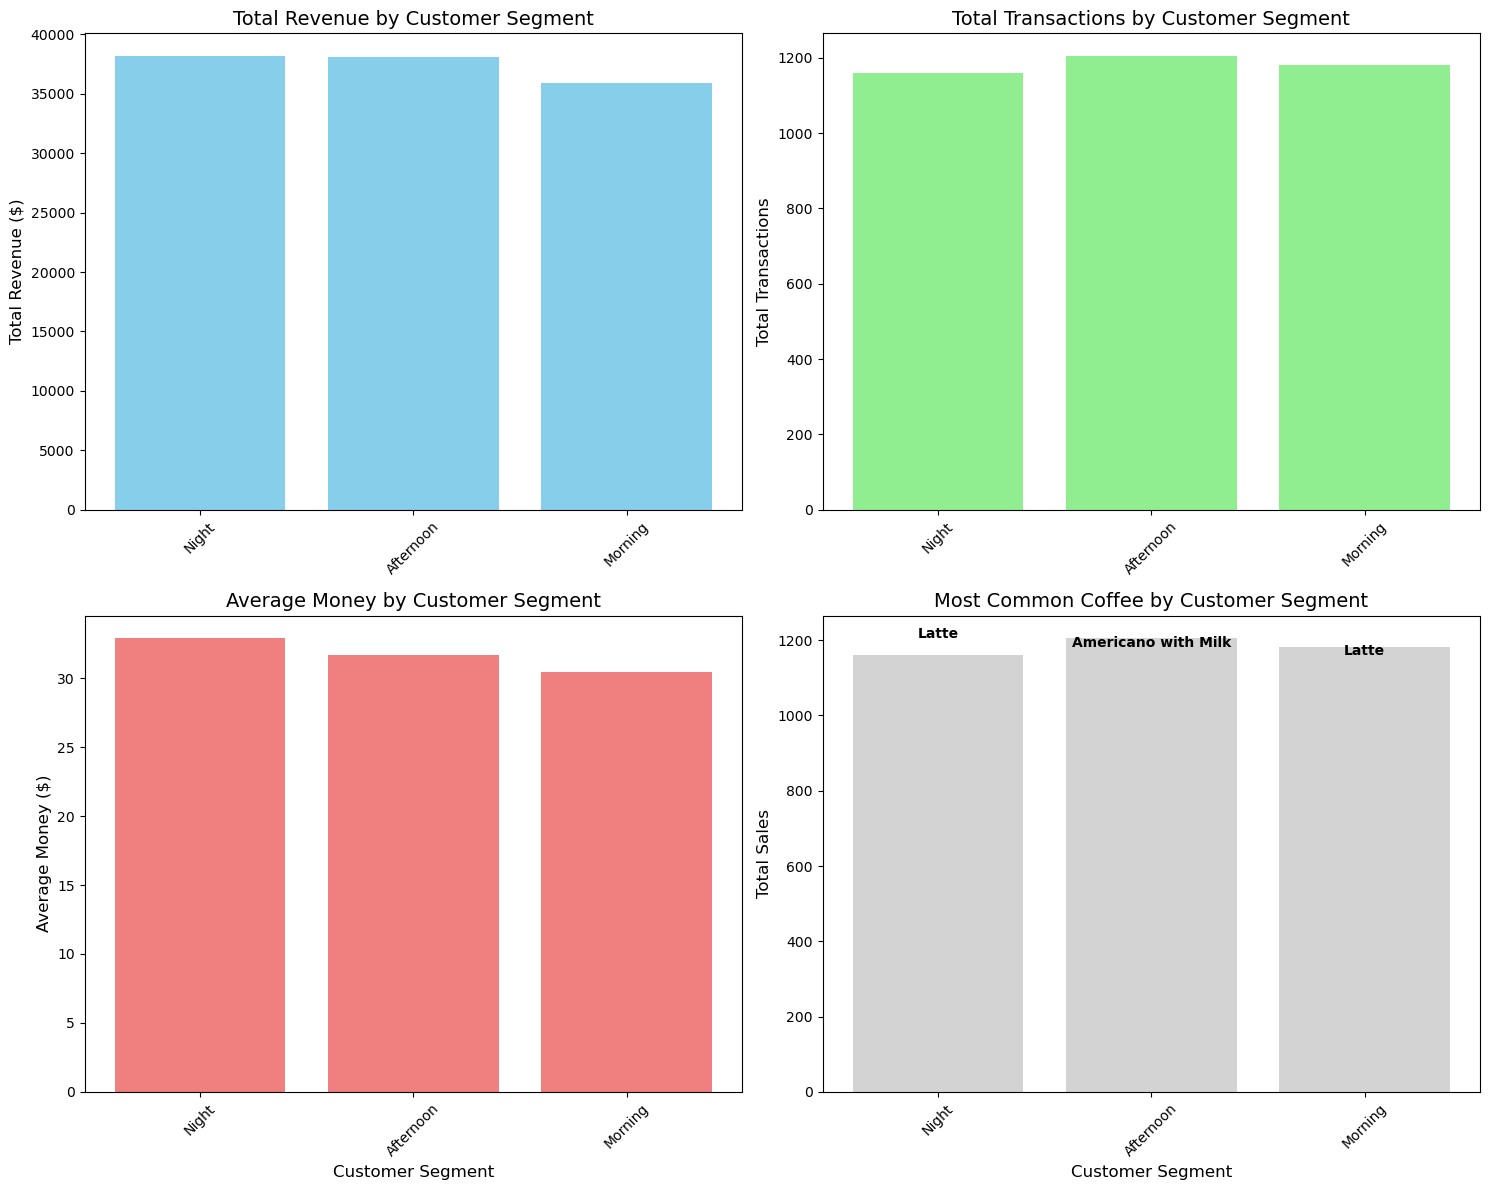

In [8]:
customer_profiles = df.groupby(['Time_of_Day', 'cash_type']).agg(
    avg_money=('money', 'mean'),
    total_transactions=('money', 'count'),
    total_revenue=('money', 'sum'),
    most_common_coffee=('coffee_name', lambda x: x.mode()[0] if not x.mode().empty else 'N/A')
).reset_index()

# Sort the profiles by total revenue to see the most valuable segments first.
customer_profiles = customer_profiles.sort_values(by='total_revenue', ascending=False)

# Create a combined label for the x-axis
customer_profiles['segment'] = customer_profiles['Time_of_Day']

print("Customer Segments with Key Metrics:")
print(customer_profiles)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Total Revenue by Customer Segment
axes[0, 0].bar(customer_profiles['segment'], customer_profiles['total_revenue'], color='skyblue')
axes[0, 0].set_title('Total Revenue by Customer Segment', fontsize=14)
axes[0, 0].set_ylabel('Total Revenue ($)', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Total Transactions by Customer Segment
axes[0, 1].bar(customer_profiles['segment'], customer_profiles['total_transactions'], color='lightgreen')
axes[0, 1].set_title('Total Transactions by Customer Segment', fontsize=14)
axes[0, 1].set_ylabel('Total Transactions', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Average Money by Customer Segment
axes[1, 0].bar(customer_profiles['segment'], customer_profiles['avg_money'], color='lightcoral')
axes[1, 0].set_title('Average Money by Customer Segment', fontsize=14)
axes[1, 0].set_ylabel('Average Money ($)', fontsize=12)
axes[1, 0].set_xlabel('Customer Segment', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)

axes[1, 1].bar(customer_profiles['segment'], customer_profiles['total_transactions'], color='lightgray')
axes[1, 1].set_title('Most Common Coffee by Customer Segment', fontsize=14)
axes[1, 1].set_ylabel('Total Sales', fontsize=12)
axes[1, 1].set_xlabel('Customer Segment', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)

for i, row in customer_profiles.iterrows():
    axes[1, 1].text(i, row['total_transactions'] + 0.1, row['most_common_coffee'], ha='center', fontsize=10, weight='bold', color='black')

plt.tight_layout()
plt.show()


Season Analysis with Key Metrics:
   season cash_type  avg_money  total_transactions  total_revenue  \
0    Fall      card  31.555238                1029       32470.34   
1  Spring      card  32.974109                 903       29775.62   
3  Winter      card  31.542559                 883       27852.08   
2  Summer      card  30.256202                 732       22147.54   

    most_common_coffee segment  
0                Latte    Fall  
1            Americano  Spring  
3  Americano with Milk  Winter  
2  Americano with Milk  Summer  


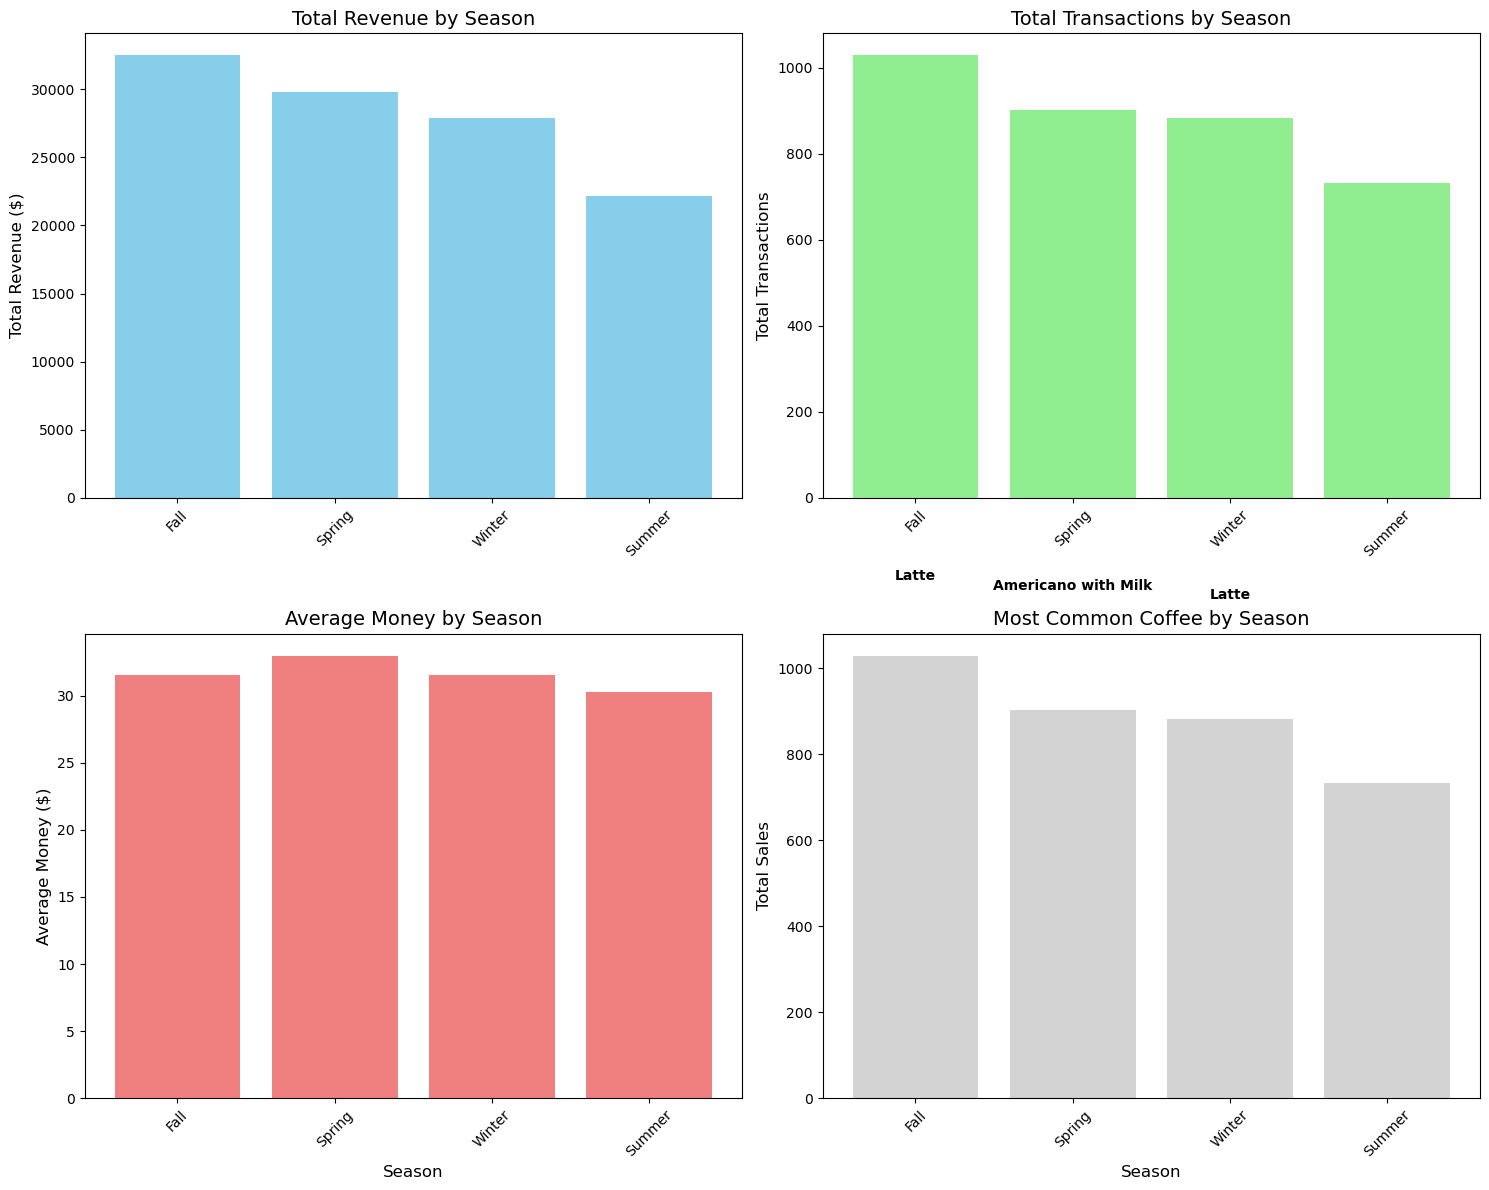

In [9]:
season_profiles = df.groupby(['season', 'cash_type']).agg(
    avg_money=('money', 'mean'),
    total_transactions=('money', 'count'),
    total_revenue=('money', 'sum'),
    most_common_coffee=('coffee_name', lambda x: x.mode()[0] if not x.mode().empty else 'N/A')
).reset_index()

# Sort the profiles by total revenue to see the most valuable segments first.
season_profiles = season_profiles.sort_values(by='total_revenue', ascending=False)

# Create a combined label for the x-axis
season_profiles['segment'] = season_profiles['season']

print("Season Analysis with Key Metrics:")
print(season_profiles)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Total Revenue by Season
axes[0, 0].bar(season_profiles['segment'], season_profiles['total_revenue'], color='skyblue')
axes[0, 0].set_title('Total Revenue by Season', fontsize=14)
axes[0, 0].set_ylabel('Total Revenue ($)', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Total Transactions by Season
axes[0, 1].bar(season_profiles['segment'], season_profiles['total_transactions'], color='lightgreen')
axes[0, 1].set_title('Total Transactions by Season', fontsize=14)
axes[0, 1].set_ylabel('Total Transactions', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Average Money by Season
axes[1, 0].bar(season_profiles['segment'], season_profiles['avg_money'], color='lightcoral')
axes[1, 0].set_title('Average Money by Season', fontsize=14)
axes[1, 0].set_ylabel('Average Money ($)', fontsize=12)
axes[1, 0].set_xlabel('Season', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)

axes[1, 1].bar(season_profiles['segment'], season_profiles['total_transactions'], color='lightgray')
axes[1, 1].set_title('Most Common Coffee by Season', fontsize=14)
axes[1, 1].set_ylabel('Total Sales', fontsize=12)
axes[1, 1].set_xlabel('Season', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)

for i, row in customer_profiles.iterrows():
    axes[1, 1].text(i, row['total_transactions'] + 0.1, row['most_common_coffee'], ha='center', fontsize=10, weight='bold', color='black')

plt.tight_layout()
plt.show()


In [10]:
weekday_map = {
    'Mon': 1,
    'Tue': 2,
    'Wed': 3,
    'Thu': 4,
    'Fri': 5,
    'Sat': 6,
    'Sun': 7
}

season_map = {
    "Spring": 1,
    "Summer": 2,
    "Fall": 3,
    "Winter": 4,
}

month_map = {
    'Mar': 0, 'Apr': 1, 'May': 2, 'Jun': 3,
    'Jul': 4, 'Aug': 5, 'Sep': 6, 'Oct': 7,
    'Nov': 8, 'Dec': 9, 'Jan': 10, 'Feb': 11
}

df['Date'] = pd.to_datetime(df['Date'])


new_df = pd.DataFrame({
    'date': df['Date'],
    'revenue': df['money'],  # revenue = money column
    'transactions': 1,  # Each row represents one transaction
    'day_of_week': df['Weekday'].map(weekday_map),  # Using the existing Weekday column
    'month': df['Month_name'].map(month_map),
    'day_of_month': df['Date'].dt.day,
    'season': df['season'].map(season_map),
    'is_weekend': df['is_weekend'].map(int),
})

predict_df =  new_df.groupby(['date']).agg({
    'revenue': 'sum',
    'transactions': 'sum'
}).reset_index()

predict_df['day_of_week'] = new_df['day_of_week']
predict_df['month'] = new_df['month']
predict_df['day_of_month'] = new_df['day_of_month']
predict_df['season'] = new_df['season']
predict_df['is_weekend'] = new_df['is_weekend']


predict_df.head()

,date,revenue,transactions,day_of_week,month,day_of_month,season,is_weekend
0,2024-03-01,396.3,11,5,0,1,1,0
1,2024-03-02,188.1,6,5,0,1,1,0
2,2024-03-03,309.1,9,5,0,1,1,0
3,2024-03-04,135.2,4,5,0,1,1,0
4,2024-03-05,338.5,9,5,0,1,1,0


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

X = predict_df[['day_of_week', 'transactions', 'month', 'day_of_month', 'season', 'is_weekend']]
y = predict_df['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Random Forest for sales forecasting
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.3f}")

MAE: 17.43
R²: 0.974


In [13]:
import xgboost as xgb

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = model.predict(X_test)

# Evaluate the model
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb):.2f}")
print(f"R²: {r2_score(y_test, y_pred_xgb):.3f}")

MAE: 15.57
R²: 0.979


In [14]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance)


        feature  importance
1  transactions    0.966449
2         month    0.015892
3  day_of_month    0.013329
0   day_of_week    0.004330
4        season    0.000000
5    is_weekend    0.000000


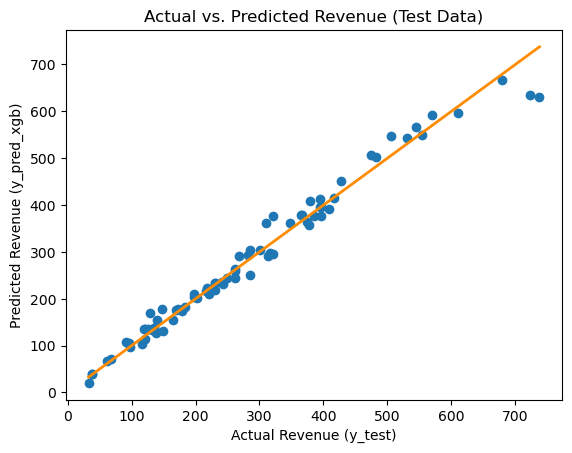

In [24]:
plt.scatter(y_test, y_pred_xgb, color='#1f77b4') # Changed color and alpha
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=2, color='darkorange') # Changed line color
plt.xlabel('Actual Revenue (y_test)') # Corrected label
plt.ylabel('Predicted Revenue (y_pred_xgb)')
plt.title('Actual vs. Predicted Revenue (Test Data)') # Corrected title
plt.show()